In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np   

In [2]:
df = pd.read_csv("brazil.csv") # read_csv: inbuilt function of pandas to read files 
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
# Number of rows and columns
print(df.shape)

(10692, 13)


In [6]:
# Name of all the columns
print(df.columns)

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [7]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
# Checking of null values
df.isnull().sum() 

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [9]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 43:       # nunique:  returns unique values in the column,
                                                    #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [10]:
 df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [12]:
# Checking outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3 - Q1
    lower_fence= Q1 - 1.5*IQR
    upper_fence= Q3 + 1.5*IQR
    ls = df.index[(df[ft]<lower_fence)|(df[ft]>upper_fence)]
    return ls
    

In [13]:
index_list=[]
for x in ['area','rooms','floor','hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)']:
    index_list.extend(outliers(df,x))

In [14]:
index_list

[5,
 19,
 86,
 105,
 131,
 143,
 148,
 157,
 176,
 180,
 202,
 219,
 230,
 241,
 254,
 265,
 306,
 317,
 320,
 322,
 330,
 337,
 338,
 354,
 398,
 406,
 415,
 420,
 421,
 456,
 472,
 493,
 510,
 517,
 534,
 538,
 546,
 547,
 558,
 566,
 570,
 575,
 592,
 595,
 626,
 628,
 640,
 650,
 654,
 661,
 666,
 669,
 686,
 689,
 718,
 722,
 748,
 753,
 777,
 800,
 838,
 848,
 867,
 889,
 915,
 944,
 974,
 978,
 990,
 995,
 1020,
 1041,
 1048,
 1066,
 1072,
 1081,
 1107,
 1114,
 1138,
 1159,
 1206,
 1208,
 1213,
 1222,
 1242,
 1250,
 1255,
 1262,
 1276,
 1280,
 1297,
 1303,
 1334,
 1369,
 1381,
 1392,
 1394,
 1410,
 1449,
 1452,
 1465,
 1467,
 1470,
 1478,
 1490,
 1500,
 1504,
 1532,
 1549,
 1562,
 1583,
 1632,
 1635,
 1636,
 1639,
 1660,
 1699,
 1736,
 1743,
 1746,
 1774,
 1789,
 1810,
 1838,
 1840,
 1862,
 1877,
 1892,
 1893,
 1915,
 1946,
 1948,
 1956,
 1960,
 1963,
 1975,
 1993,
 2050,
 2055,
 2059,
 2061,
 2072,
 2087,
 2097,
 2103,
 2134,
 2150,
 2172,
 2182,
 2217,
 2219,
 2229,
 2236,
 22

In [21]:
# remove outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [22]:
df_new=remove(df,index_list)

In [24]:
# Number of rows and columns after removing outliers
df_new.shape

(8550, 13)

In [26]:
df_new.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000
mean,98.125029,2.210409,1.811111,1.186433,4.642339,673.421287,2739.844444,156.957310,37.089123,3607.472632
std,66.777610,0.941404,1.001224,1.172701,4.419889,625.263415,1862.507915,180.613479,25.320531,2375.195394
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,50.000000,1.000000,1.000000,0.000000,1.000000,210.000000,1375.000000,25.000000,19.000000,1840.500000
50%,76.000000,2.000000,2.000000,1.000000,3.000000,511.500000,2200.000000,90.000000,30.000000,2930.000000
75%,125.000000,3.000000,2.000000,2.000000,7.000000,985.000000,3500.000000,225.000000,47.000000,4697.000000
max,367.000000,4.000000,7.000000,10.000000,18.000000,2800.000000,10200.000000,880.000000,138.000000,13760.000000


In [38]:
df_city = df_new[(df_new["city"] == "São Paulo") | (df_new["city"] == "Rio de Janeiro")] # For reference
df_city.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000
mean,98.018021,2.174205,1.840989,1.160601,5.018728,767.910777,3070.090106,176.040813,40.684806,4054.912721
std,65.545933,0.924833,1.015074,1.190097,4.669990,673.175473,1927.374652,195.965997,25.857425,2462.218191
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,500.000000,0.000000,4.000000,507.000000
25%,50.000000,1.000000,1.000000,0.000000,1.000000,250.000000,1650.000000,25.000000,22.000000,2194.250000
50%,78.000000,2.000000,2.000000,1.000000,4.000000,630.000000,2500.000000,103.000000,33.000000,3433.000000
75%,130.000000,3.000000,2.000000,2.000000,8.000000,1154.250000,4000.000000,258.250000,52.000000,5279.000000
max,362.000000,4.000000,7.000000,10.000000,18.000000,2800.000000,10200.000000,880.000000,136.000000,13760.000000


In [ ]:
# 1. property in cities according to rent and furniture where pets are acceptable

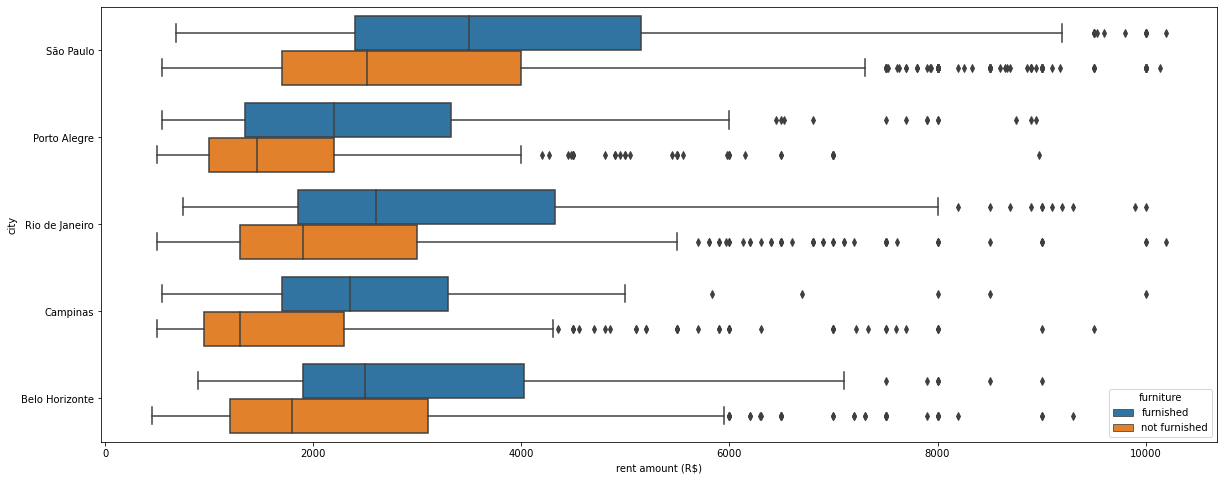

In [63]:
df5 = df_new[(df_new["animal"] == "acept")]#&(df_new["furniture"] == "furnished")]
fig, ax = plt.subplots(1, figsize = (20, 8))
sns.boxplot(x = df5["rent amount (R$)"] ,y = df5["city"], hue=df_new["furniture"])
plt.show()

# Porto Alagre is the preferred city followed by Campinas

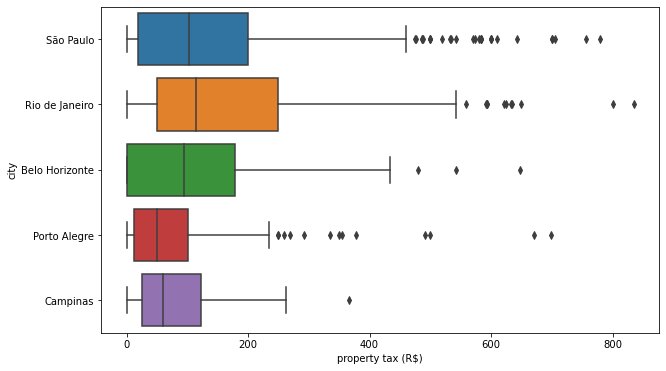

In [46]:
# 2. property in cities according property tax which have 4 rooms or less with and almost 2 bathrooms and are furnished
df6 = df_new[(df_new["rooms"]<=4)&(df_new["furniture"] == "furnished")&(df_new["bathroom"]<=2)]
fig, ax = plt.subplots(1, figsize = (10, 6))
sns.boxplot(x = df6["property tax (R$)"] ,y = df6["city"] )
plt.show()


# Porto Alagre is preferred city where 4 rooms and 2 bathrooms containing property has less tax

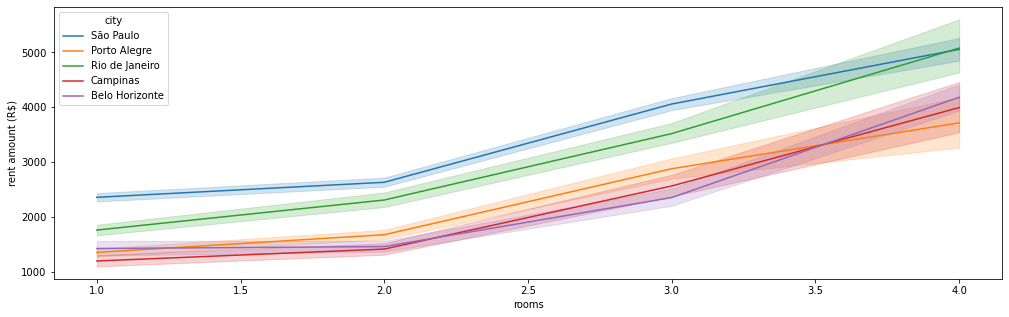

In [61]:
# 3. Relationship between Rooms and Rent amount into different cities
fig, ax = plt.subplots(1, figsize = (17, 5))
sns.lineplot(y=df_new["rent amount (R$)"], x=df_new["rooms"], hue=df_new["city"])
plt.show()

# With the increase in room number, Rent increases and most cheap city is Campinas followed by Porto Alegre

2800


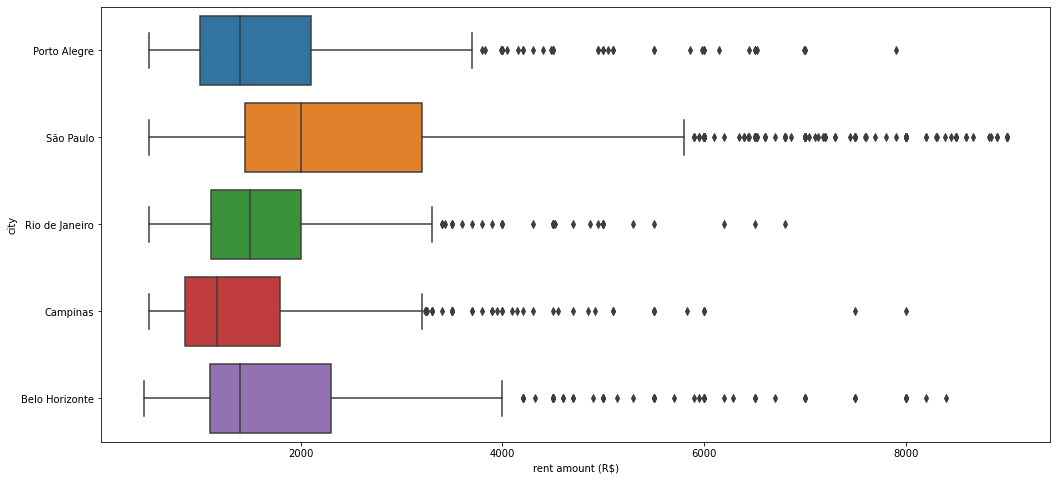

In [56]:
# 4. Cities on the basis of rent amount where hoa(Homeowner association tax) is less
max_1 = df_new["hoa (R$)"].mean()
print(df10)
df15 = df_new[(df_new["hoa (R$)"]< max_1)]
fig, ax = plt.subplots(1, figsize = (17, 8))
sns.boxplot(x = df15["rent amount (R$)"] ,y = df15["city"]) 
plt.show()

# Campinas is the city with least rent amount where hoa is also low.

# Conclusion
Campinas is the preferred city followed by Porto Alagre for relocating as living expences are low as compared to other cities.